In [1]:
from datascience import *
import numpy as np
path_data = '../../../../data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### The Regression Line ###
The correlation coefficient $r$ doesn't just measure how clustered the points in a scatter plot are about a straight line. It also helps identify the straight line about which the points are clustered. In this section we will retrace the path that Galton and Pearson took to discover that line.

Galton's data on the heights of parents and their adult children showed a linear association. The linearity was confirmed when our predictions of the children's heights based on the midparent heights roughly followed a straight line.

In [2]:
galton = Table.read_table(path_data + 'galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [3]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   

In [4]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

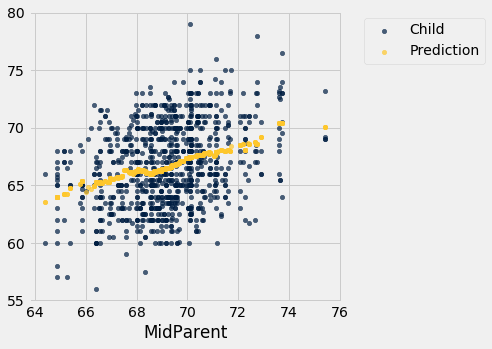

In [5]:
heights_with_predictions.scatter('MidParent')

### Measuring in Standard Units ###

Let's see if we can find a way to identify this line. First, notice that linear association doesn't depend on the units of measurement – we might as well measure both variables in standard units. 

In [6]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [7]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


On this scale, we can calculate our predictions exactly as before. But first we have to figure out how to convert our old definition of "close" points to a value on the new scale. We had said that midparent heights were "close" if they were within 0.5 inches of each other. Since standard units measure distances in units of SDs, we have to figure out how many SDs of midparent height correspond to 0.5 inches.

One SD of midparent heights is about 1.8 inches. So 0.5 inches is about 0.28 SDs.

In [8]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [9]:
0.5/sd_midparent

0.277561110965367

 We are now ready to modify our prediction function to make predictions on the standard units scale. All that has changed is that we are using the table of values in standard units, and defining "close" as above.

In [10]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()   

In [11]:
heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

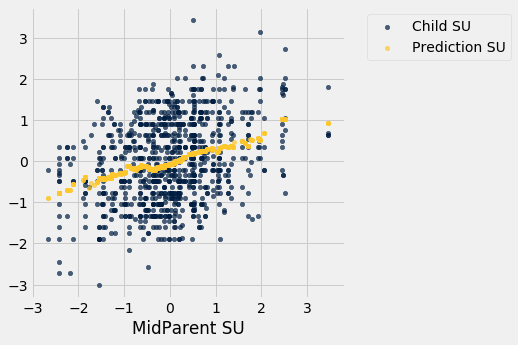

In [12]:
heights_with_su_predictions.scatter('MidParent SU')

This plot looks exactly like the plot drawn on the original scale. Only the numbers on the axes have changed. This confirms that we can understand the prediction process by just working in standard units.

### Identifying the Line in Standard Units ###
Galton's scatter plot has a *football* shape – that is, it is roughly oval like an American football. Not all scatter plots are football shaped, not even those that show linear association. But in this section we will pretend we are Galton and work only with football shaped scatter plots. In the next section, we will generalize our analysis to other shapes of plots.

Here is a football shaped scatter plot with both variables measured in standard units. The 45 degree line is shown in red.

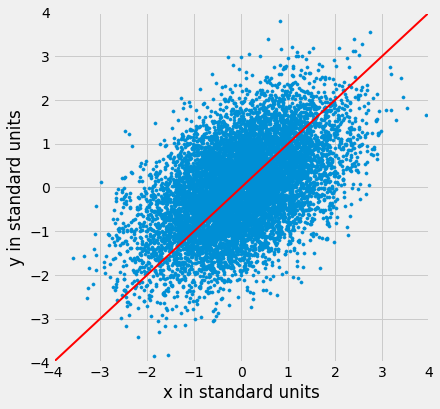

In [13]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
#plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

But the 45 degree line is not the line that picks off the centers of the vertical strips. You can see that in the figure below, where the vertical line at 1.5 standard units is shown in black. The points on the scatter plot near the black line all have heights roughly in the -2 to 3 range. The red line is too high to pick off the center.

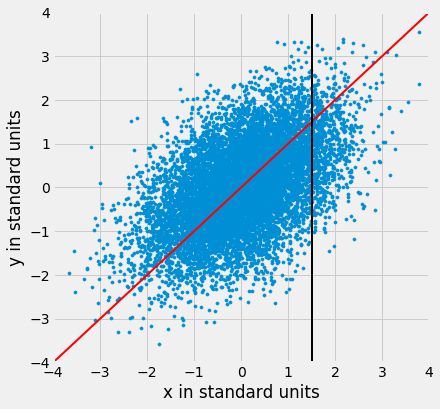

In [14]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

So the 45 degree line is not the "graph of averages." That line is the green one shown below.

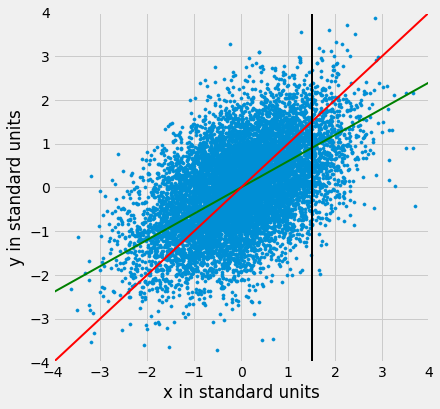

In [15]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plots.figure(figsize=(6,6))
plots.xlim(-4, 4)
plots.ylim(-4, 4)
plots.scatter(x_demo, y_demo, s=10)
plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');

Both lines go through the origin (0, 0). The green line goes through the centers of the vertical strips (at least roughly), and is *flatter* than the red 45 degree line. 

The slope of the 45 degree line is 1. So the slope of the green "graph of averages" line is a value that is positive but less than 1. 

What value could that be? You've guessed it – it's $r$.

### The Regression Line, in Standard Units ###
The green "graph of averages" line is called the *regression line*, for reasons we will explain shortly. But first, let's simulate some football shaped scatter plots with different values of $r$, and see how the line changes. In each case, the red 45 degree line has been drawn for comparison.

The function that performs the simulation is called `regression_line` and takes $r$ as its argument.

In [16]:

def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(6, 6))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

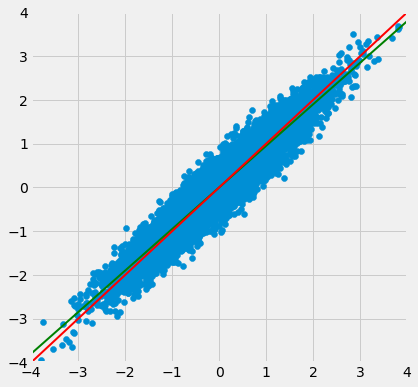

In [17]:
regression_line(0.95)

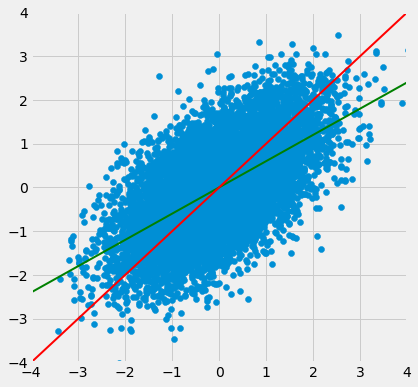

In [18]:
regression_line(0.6)

When $r$ is close to 1, the scatter plot, the 45 degree line, and the regression line are all very close to each other. But for more moderate values of $r$, the regression line is noticeably flatter.

### The Regression Effect ###
In terms of prediction, this means that for a parents whose midparent height is at 1.5 standard units, our prediction of the child's height is somewhat *less* than 1.5 standard units. If the midparent height is 2 standard units, we predict that the child's height will be somewhat less than 2 standard units.

In other words, we predict that the child will be somewhat closer to average than the parents were.

This didn't please Sir Francis Galton. He had been hoping that exceptionally tall parents would have children who were just as exceptionally tall. However, the data were clear, and Galton realized that the tall parents have children who are not quite as exceptionally tall, on average. Frustrated, Galton called this phenomenon "regression to mediocrity." 

Galton also noticed that exceptionally short parents had children who were somewhat taller relative to their generation, on average. In general, individuals who are away from average on one variable are expected to be not quite as far away from average on the other. This is called the *regression effect*.

### The Equation of the Regression Line ###
In regression, we use the value of one variable (which we will call $x$) to predict the value of another (which we will call $y$). When the variables $x$ and $y$ are measured in standard units, the regression line for predicting $y$ based on $x$ has slope $r$ and passes through the origin. Thus the equation of the regression line can be written as:

$$
\mbox{estimate of }y ~=~ r \cdot x ~~~
\mbox{when both variables are measured in standard units}
$$

In the original units of the data, this becomes

$$
\frac{\mbox{estimate of}~y ~-~\mbox{average of}~y}{\mbox{SD of}~y}
~=~ r \times 
\frac{\mbox{the given}~x ~-~\mbox{average of}~x}{\mbox{SD of}~x}
$$


![regline](../../../images/regline.png)

The slope and intercept of the regression line in original units can be derived from the diagram above. 

$$
\mathbf{\mbox{slope of the regression line}} ~=~ r \cdot
\frac{\mbox{SD of }y}{\mbox{SD of }x}
$$

$$
\mathbf{\mbox{intercept of the regression line}} ~=~
\mbox{average of }y ~-~ \mbox{slope} \cdot \mbox{average of }x
$$

The three functions below compute the correlation, slope, and intercept. All of them take three arguments: the name of the table, the label of the column containing $x$, and the label of the column containing $y$.

In [19]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

### The Regression Line and Galton's Data ###
The correlation between midparent height and child's height is 0.32:

In [20]:
galton_r = correlation(heights, 'MidParent', 'Child')
galton_r

0.32094989606395924

We can also find the equation of the regression line for predicting the child's height based on midparent height.

In [21]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

The equation of the regression line is

$$
\mbox{estimate of child's height} ~=~ 0.64 \cdot \mbox{midparent height} ~+~ 22.64
$$

This is also known as the *regression equation.* The principal use of the regression equation is to predict $y$ based on $x$.

For example, for a midparent height of 70.48 inches, the regression equation predicts the child's height to be 67.56 inches.

In [22]:
galton_slope*70.48 + galton_intercept

67.55743656799862

Our original prediction, created by taking the average height of all children who had midparent heights close to 70.48, came out to be pretty close: 67.63 inches compared to the regression line's prediction of 67.55 inches.

In [23]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

MidParent,Child,Prediction
70.48,74,67.6342
70.48,70,67.6342
70.48,68,67.6342


Here are all of the rows in Galton's table, along with our original predictions and the new regression predictions of the children's heights.

In [24]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


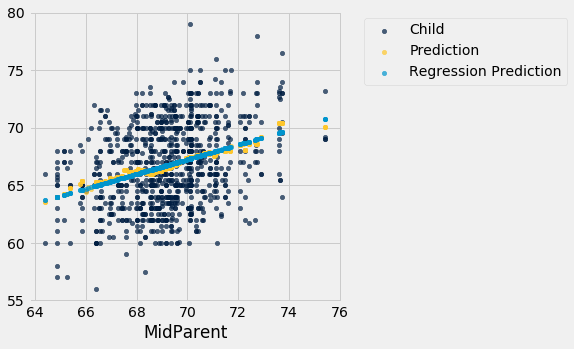

In [25]:
heights_with_predictions.scatter('MidParent')

The grey dots show the regression predictions, all on the regression line. Notice how the line is very close to the gold graph of averages. For these data, the regression line does a good job of approximating the centers of the vertical strips.

### Fitted Values ##
The predictions all lie on the line and are known as the "fitted values". The function `fit` takes the name of the table and the labels of $x$ and $y$, and returns an array of fitted values, one fitted value for each point in the scatter plot.

In [26]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

It is easier to see the line in the graph below than in the one above.

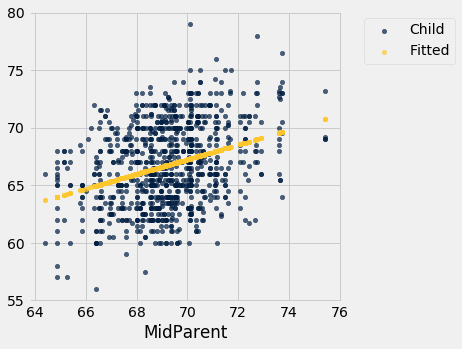

In [27]:
heights.with_column('Fitted', fit(heights, 'MidParent', 'Child')).scatter('MidParent')

Another way to draw the line is to use the option `fit_line=True` with the Table method `scatter`.

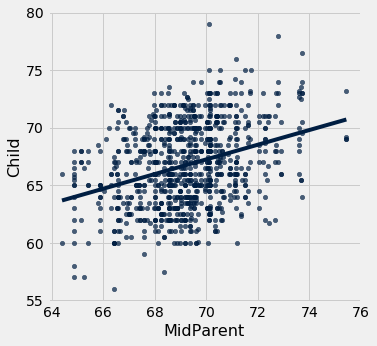

In [28]:
heights.scatter('MidParent', fit_line=True)

### Units of Measurement of the Slope ###
The slope is a ratio, and it worth taking a moment to study the units in which it is measured. Our example comes from the familiar dataset about mothers who gave birth in a hospital system. The scatter plot of pregnancy weights versus heights looks like a football that has been used in one game too many, but it's close enough to a football that we can justify putting our fitted line through it. In later sections we will see how to make such justifications more formal.

In [29]:
baby = Table.read_table(path_data + 'baby.csv')

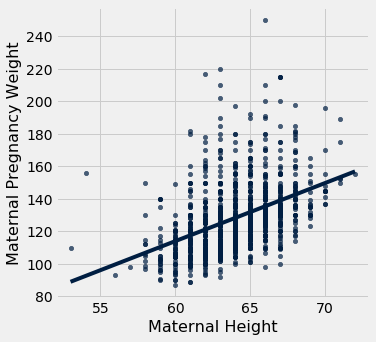

In [30]:
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)

In [31]:
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

3.572846259275056

The slope of the regression line is **3.57 pounds per inch**. This means that for two women who are 1 inch apart in height, our prediction of pregnancy weight will differ by 3.57 pounds. For a woman who is 2 inches taller than another, our prediction of pregnancy weight will be 
$$
2 \times 3.57 ~=~ 7.14
$$
pounds more than our prediction for the shorter woman.

Notice that the successive vertical strips in the scatter plot are one inch apart, because the heights have been rounded to the nearest inch. Another way to think about the slope is to take any two consecutive strips (which are necessarily 1 inch apart), corresponding to two groups of women who are separated by 1 inch in height. The slope of 3.57 pounds per inch means that the average pregnancy weight of the taller group is about 3.57 pounds more than that of the shorter group.


### Example

Suppose that our goal is to use regression to estimate the height of a basset hound based on its weight, using a sample that looks consistent with the regression model. Suppose the observed correlation $r$ is 0.5, and that the summary statistics for the two variables are as in the table below: 

|       |**average**    |**SD**     |   
|------:|:-------------:|:---------:|
|height |14 inches      |2 inches   |
|weight |50 pounds      |5 pounds   |

To calculate the equation of the regression line, we need the slope and the intercept.

$$
\mbox{slope} ~=~ \frac{r \cdot \mbox{SD of }y}{\mbox{SD of }x} ~=~
\frac{0.5 \cdot 2 \mbox{ inches}}{5 \mbox{ pounds}} ~=~ 0.2 ~\mbox{inches per pound}
$$


$$
\mbox{intercept} ~=~ \mbox{average of }y - \mbox{slope}\cdot \mbox{average of } x
~=~ 14 \mbox{ inches} ~-~ 0.2 \mbox{ inches per pound} \cdot 50 \mbox{ pounds}
~=~ 4 \mbox{ inches}
$$

The equation of the regression line allows us to calculate the estimated height, in inches,
based on a given weight in pounds:

$$
\mbox{estimated height} ~=~ 0.2 \cdot \mbox{given weight} ~+~ 4
$$

The slope of the line is measures the increase in the estimated height per unit increase in weight. The slope is positive, and it is important to note that this does not mean that we think basset hounds get taller if they put on weight. The slope reflects the difference in the average heights of two groups of dogs that are 1 pound apart in weight. Specifically, consider a group of dogs whose weight is $w$ pounds, and the group whose weight is $w+1$ pounds. The second group is estimated to be 0.2 inches taller, on average. This is true for all values of $w$ in the sample.

In general, the slope of the regression line can be interpreted as the average increase in $y$ per unit increase in $x$. Note that if the slope is negative, then for every unit increase in $x$, the average of $y$ decreases.

### Endnote ###
Even though we won't establish the mathematical basis for the regression equation, we can see that it gives pretty good predictions when the scatter plot is football shaped. It is a surprising mathematical fact that no matter what the shape of the scatter plot, the same equation gives the "best" among all straight lines. That's the topic of the next section.